# Session 6 further work

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Section 3

### Question 1

We start with the propagator function from in-class work

In [2]:
def explicit_wave_eq_update(theta_n, theta_nm1,r):
    """Update wave equation using simple finite difference 
    approach.  Assumes periodic boundary conditions.
    Inputs: 
    theta_n   Wave at time t_n     = n*dt
    theta_nm1 Wave at time t_{n-1} = (n-1)*dt
    r         Constant (c dt/dx)**2
    Output:
    theta at time t_{n+1} = (n+1)*dt """
    N = np.size(theta_n)
    theta_np1 = np.zeros(N)
    theta_np1 = 2.0*(1-r*r)*theta_n - theta_nm1 + r*r*(np.roll(theta_n,1) + np.roll(theta_n,-1))
    return theta_np1

In [3]:
wavelength = 1 #m
wavevector = 2*np.pi/wavelength
frequency = 1 # Hz
ang_freq = 2*np.pi*frequency
speed = wavelength*frequency
r = 0.9

# Define variables for N=20
N1 = 20
dx1 = wavelength/N1
dt1 = r*dx1/speed
q1_x20 = np.arange(0,3*wavelength,dx1)

# Define variables for N=5
N2 = 5
dx2 = wavelength/N2
dt2 = r*dx2/speed
q1_x5 = np.arange(0,3*wavelength,dx2)

In [4]:
total_t = 9.001 # Ensure we propagate for long enough

# Run for N=20
iters1 = int(total_t/dt1)-1
t = 0
theta_0 = np.sin(wavevector*q1_x20 - ang_freq*t)
t += dt1
theta_1 = np.sin(wavevector*q1_x20 - ang_freq*t)
for n in range(iters1):
    theta_next = explicit_wave_eq_update(theta_1,theta_0,r)
    theta_0 = theta_1
    theta_1 = theta_next
theta_end_N20 = np.copy(theta_next)

# Run for N=5
iters2 = int(total_t/dt2)-1
t = 0
theta_0 = np.sin(wavevector*q1_x5 - ang_freq*t)
t += dt2
theta_1 = np.sin(wavevector*q1_x5 - ang_freq*t)
for n in range(iters2):
    theta_next = explicit_wave_eq_update(theta_1,theta_0,r)
    theta_0 = theta_1
    theta_1 = theta_next
theta_end_N5 = np.copy(theta_next)

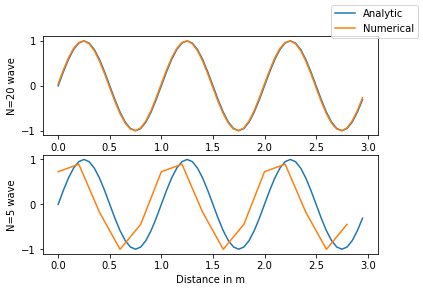

In [5]:
fig_S3Q1 = plt.figure()
ax_S3Q1a = fig_S3Q1.add_subplot(211)
ax_S3Q1a.plot(q1_x20,np.sin(wavevector*q1_x20))
ax_S3Q1a.plot(q1_x20,theta_end_N20)
ax_S3Q1a.set_ylabel("N=20 wave")
ax_S3Q1b = fig_S3Q1.add_subplot(212)
ax_S3Q1b.plot(q1_x20,np.sin(wavevector*q1_x20),label='Analytic')
ax_S3Q1b.plot(q1_x5,theta_end_N5,label='Numerical')
ax_S3Q1b.set_ylabel("N=5 wave")
ax_S3Q1b.set_xlabel("Distance in m")
fig_S3Q1.legend()

We see that the small number of points has two effects: first, the representation of the wave is rather poor; second, the *phase* velocity of the wave is different to the analytic solution (the peaks are in the wrong place).  This is not an issue for N=20.

## Section 4

### Question 1

In [6]:
def explicit_2D_wave_eq_update(theta_n, theta_nm1,r):
    """Update wave equation using simple finite difference 
    approach in 2D.  Assumes periodic boundary conditions.
    Inputs: 
    theta_n   Wave at time t_n     = n*dt
    theta_nm1 Wave at time t_{n-1} = (n-1)*dt
    r         Constant (c dt/dx)**2
    Output:
    theta at time t_{n+1} = (n+1)*dt """
    theta_np1 = 2.0*theta_n - theta_nm1 + r*r*(np.roll(theta_n,1,axis=0) - 
                                               2.0*theta_n + np.roll(theta_n,-1,axis=0) 
                                              ) + r*r*(np.roll(theta_n,1,axis=1) - 
                                               2.0*theta_n + np.roll(theta_n,-1,axis=1) )
    return theta_np1

In [7]:
# Define number of points
N = 100
# Initialise
dx = wavelength/N # Also dy
S4Q2_x = np.arange(0,3*wavelength,dx)
S4Q2_y = np.arange(0,3*wavelength,dx)
S4_x2d, S4_y2d = np.meshgrid(S4Q2_x,S4Q2_y)

In [8]:
midy = 1.5*wavelength
sigma = 1.0
# Start with a sine wave in x, with Gaussian envelope in y
t = 0
theta_0 = np.sin(wavevector*S4_x2d - ang_freq*t)*np.exp(-(S4_y2d-midy)**2/sigma)
# Now zero beyond 1m
theta_0[:,N:] = 0.0
theta_0[:,0] = 0.0
r = 0.2
dt = r*dx/speed
t += dt
theta_1 = np.sin(wavevector*S4_x2d - ang_freq*t)*np.exp(-(S4_y2d-midy)**2/sigma)
# Confine starting wave to left hand side
theta_0[:,N:] = 0.0
theta_1[:,N:] = 0.0
theta_1[:,0] = 0.0
# Boundary conditions at top and bottom
theta_0[0,:] = 0.0
theta_0[3*N-1,:] = 0.0
theta_1[0,:] = 0.0
theta_1[3*N-1,:] = 0.0

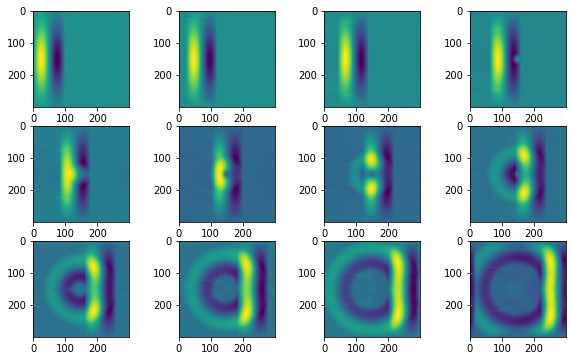

In [9]:
iters = 1200
figS4Q1 = plt.figure(figsize=(10,6))
index = 1
midn = int(3*N/2)
for n in range(iters):
    # Scatterer in centre of field
    theta_0[midn-5:midn+5,midn-5:midn+5] *= 0.5
    theta_1[midn-5:midn+5,midn-5:midn+5] *= 0.5
    # Update
    theta_next = explicit_2D_wave_eq_update(theta_1,theta_0,r)
    # Boundary conditions: hard walls at top & bottom
    theta_next[0,:] = 0.0
    theta_next[3*N-1,:] = 0.0
    # Update
    theta_0 = theta_1
    theta_1 = theta_next
    if n%100==0:
        ax = figS4Q1.add_subplot(3,4,index)
        ax.imshow(theta_next)
        index+=1

The fixed block in the centre scatters the wave as it passes.  While this is relatively simple, this solver could be extended to more complex problems quite easily.

## 6. Time-dependent Schrodinger equation

### Question 1

We initialise and create the M and N calculation routines as before.  The only change in this case is the form of the potential which is passed to the M routine.

In [10]:
Nx = 401
x = np.linspace(-100,100,Nx)
k = 1
sigma = 10.0
x0 = -75.0
psi0 = np.exp(1j*x)*np.exp(-(x-x0)**2/sigma**2)

In [11]:
def calc_M(N,zeta,V,dt):
    """Calculate matrix M for Crank-Nicolson solution of TDSE
    Inputs: 
    N    size of matrix
    zeta parameter
    V    potential (array)
    dt   time step
    Outputs:
    (NxN) matrix"""
    maindiag = np.full(N,2.0*(2.0+1j*zeta)) + 2j*dt*V
    offdiag = np.full(N-1,-1j*zeta)
    output = np.diag(maindiag) + np.diag(offdiag,k=1) + np.diag(offdiag,k=-1)
    return output

In [12]:
def calc_N(N,zeta,V,dt):
    """Calculate matrix N for Crank-Nicolson solution of TDSE
    Inputs: 
    N    size of matrix
    zeta parameter
    V    potential (array)
    dt   time step
    Outputs:
    (NxN) matrix"""
    maindiag = np.full(N,2.0*(2.0-1j*zeta)) - 2j*dt*V
    offdiag = np.full(N-1,1j*zeta)
    output = np.diag(maindiag) + np.diag(offdiag,k=1) + np.diag(offdiag,k=-1)
    return output

In [13]:
Vbarr = np.zeros_like(x,dtype=complex)
mid = int(Nx/2)
wid = 20
Vbarr[mid-wid:mid+wid] = 0.5
#Vbarr[mid:] = 0.5
dx = 0.5
dt = 0.1
zeta = dt/dx**2
matM = calc_M(Nx,zeta,Vbarr,dt)
matN = calc_N(Nx,zeta,Vbarr,dt)
#print(matM)
#print(matN)
matMinv = np.linalg.inv(matM)
b = np.zeros(Nx,dtype=complex)
matMinvN = np.dot(matMinv,matN)
matMinvb = np.dot(matMinv,b) # Not strictly necessary !

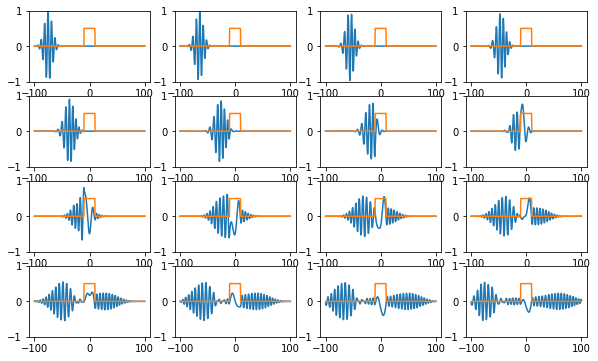

In [14]:
iters = 1600
psi0[0] = 0.0
psi0[-1] = 0.0
psi_this = np.copy(psi0)
figS5Q4 = plt.figure(figsize=(10,6))
index = 1
for i in range(iters):
    psi_next = matMinvb + np.dot(matMinvN,psi_this)
    psi_this = psi_next
    if i%100 == 0:
        ax = figS5Q4.add_subplot(4,4,index)
        ax.plot(x,psi_this.real)
        ax.plot(x,Vbarr.real)
        ax.set_ylim((-1,1))
        index += 1

We see that the barrier both reflects and transmits the wave; note that the height is quite important and going much higher than 0.5 will result in mostly reflection.

### Question 2

In [15]:
Vbarr = np.zeros_like(x,dtype=complex)
mid = int(Nx/2)
wid = 20
# Make a step from mid onwards
Vbarr[mid:] = 0.5
dx = 0.5
dt = 0.1
zeta = dt/dx**2
matM = calc_M(Nx,zeta,Vbarr,dt)
matN = calc_N(Nx,zeta,Vbarr,dt)
#print(matM)
#print(matN)
matMinv = np.linalg.inv(matM)
b = np.zeros(Nx,dtype=complex)
matMinvN = np.dot(matMinv,matN)
matMinvb = np.dot(matMinv,b) # Not strictly necessary !

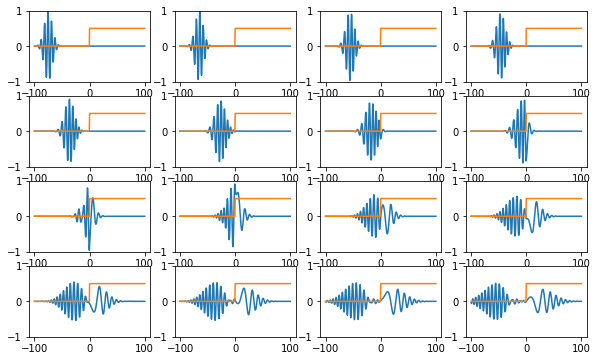

In [16]:
iters = 1600
psi0[0] = 0.0
psi0[-1] = 0.0
psi_this = np.copy(psi0)
figS5Q4 = plt.figure(figsize=(10,6))
index = 1
for i in range(iters):
    psi_next = matMinvb + np.dot(matMinvN,psi_this)
    psi_this = psi_next
    if i%100 == 0:
        ax = figS5Q4.add_subplot(4,4,index)
        ax.plot(x,psi_this.real)
        ax.plot(x,Vbarr.real)
        ax.set_ylim((-1,1))
        index += 1

Notice how the wavelength changes in the region where the potential is raised.

## 7. Time-independent Schrodinger equation

Note that we are passing arguments to the function called by RK4, so I have added these to the RK4 call.

In [17]:
def TISE_coupled_first_order(y,x,E,V):
    """TISE split into two first-order ODEs
    
    Inputs:
    y  Two entry array containing psi and phi (dpsi/dx)
    x  Value of x
    E  Energy
    V  Potential function (given x returns V(x))
    
    Output:
    Two entry array of dpsi and dphi"""
    psi = y[0]
    phi = y[1]
    dpsi = phi
    dphi = 2.0*(V(x) - E)*psi
    return np.array([dpsi,dphi])

In [18]:
def RK4_solver(fun,y0,dt,N,E,V):
    """Solve dy/dt = fun(y,t) using fourth-order RK method.
    Inputs:
    fun  f(y,t)
    y0   Initial condition - assumed to be two-component
    dt   Step size
    N    Number of steps
    Returns: two arrays of length N+1 (x and v or equivalent)
    """
    x = np.zeros(N+1,dtype=complex)
    v = np.zeros(N+1,dtype=complex)
    x[0] = y0[0]
    v[0] = y0[1]
    t = 0
    y = y0
    for i in range(N):
        k1 = dt*fun(y,t,E,V)
        k2 = dt*fun(y+0.5*k1,t+0.5*dt,E,V)
        k3 = dt*fun(y+0.5*k2,t+0.5*dt,E,V)
        k4 = dt*fun(y+k3,t+dt,E,V)
        y=y+(k1+2*k2+2*k3+k4)/6
        x[i+1] = y[0]
        v[i+1] = y[1]
    return x, v

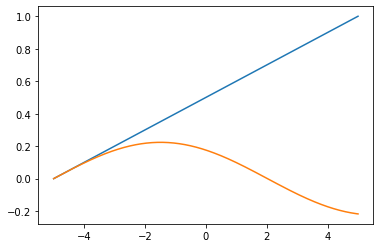

In [19]:
dx = 0.01
xmin = -5
xmax = 5
width = xmax - xmin
Nx = int((xmax-xmin)/dx)
x = np.linspace(xmin,xmax,Nx+1)
def V(x):
    """Potential function to pass to RK4"""
    return 0.0

psi = np.zeros_like(x,dtype=complex)
E0 = 0.0
E1 = 0.1
psi0 = np.array([0.0 + 0.0j,0.1 + 0.0j])
psi_out0, phi_out = RK4_solver(TISE_coupled_first_order,psi0,dx,Nx,E0,V)
psi_out1, phi_out = RK4_solver(TISE_coupled_first_order,psi0,dx,Nx,E1,V)
plt.plot(x,psi_out0.real)
plt.plot(x,psi_out1.real)

After  10  iterations, energy is  (0.04935492167743478+0j)


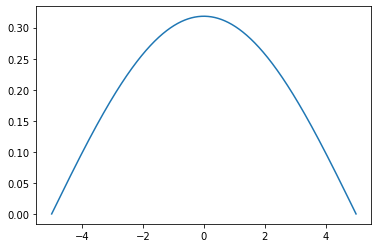

In [20]:
f0 = psi_out0[-1]
f1 = psi_out1[-1]
n = 0
tol = 1e-4
while abs(E1 - E0) > tol:
    n += 1
    # Calculate next point
    dE = E1 - E0
    df = f1 - f0
    Enext = E1 - f1 * dE / df
    # Update storage
    E0 = E1
    E1 = Enext
    f0 = f1
    psi_out, phi_out = RK4_solver(TISE_coupled_first_order,psi0,dx,Nx,E1,V)
    f1 = psi_out[-1]
print("After ",n," iterations, energy is ",E0)
plt.plot(x,psi_out.real)

This gives the same energy as the simple solver did to an accuracy of 1e-8Ha (the appropriate energy unit here).  We could test how sensitive to step size these methods are to understand them further.